<a href="https://colab.research.google.com/github/caseynv/ANN-project/blob/master/PROJECT_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MACHINE LEARNING FOR OZONE LEVEL CLASSIFICATION**

#**INTRODUCTION**
----
The persistence of highly concentrated ozone levels in the troposphere does harm to humans, animals, and plants. It is therefore vital to detect high levels of ozone early in order to ensure a healthy environment, especially for the elderly, children, and asthmatics. This project predicts the Ozone concentration in the atmosphere using the machine
learning technique. The dataset comprises of air pollutants and meteorological variables.


In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #visualize missing values
from matplotlib.pyplot import hist,bar
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import hist,bar

%matplotlib inline


###**Data Collection**

---


*Connect Google drive (where the data file is) to Google Colab. Print the first lines of the data*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ozone-data1.csv')
data.head(5)
data.tail(5)
data.shape
#data["NitricOxide"]

(973, 14)

### **Data Preparation**

---


*Check the variable types, missing values, outlying and possibly wrong records, and
other issues.*

* The Data types of the variables are float64 and int64
* There are no missing values in the Data
* No issues observed
* From the Boxplot, we can clearly visualise the outliers for the features in the dataset. Outliers were observed in the following features Nitricoxide, NitrogenDioxide
OxideofNitrogen, WindSpeed, ResultantWindDirection, Maximum wind gust, Outdoor Temperature, DewPoint Temperature, Relative Humidity and PM10




In [ ]:
data.info()
print(data.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NitricOxide             973 non-null    float64
 1   NitrogenDioxide         973 non-null    float64
 2   OxidesofNitrogen        973 non-null    float64
 3   WindSpeed               973 non-null    float64
 4   ResultantWindSpeed      973 non-null    float64
 5   ResultantWindDirection  973 non-null    int64  
 6   MaximumWindGust         973 non-null    float64
 7   Std.Dev.WindDirection   973 non-null    int64  
 8   OutdoorTemperature      973 non-null    float64
 9   DewPointTemperature     973 non-null    float64
 10  RelativeHumidity        973 non-null    float64
 11  SolarRadiation          973 non-null    float64
 12  PM10                    973 non-null    float64
 13  Ozone                   973 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 106

### **Data Preparation**

---

* The Data types of the variables are float64 and int64
* There are no missing values in the Data
* No issues observed
* Outliers were observed in the following features Nitricoxide, NitrogenDioxide
OxideofNitrogen, WindSpeed, ResultantWindDirection, Maximum wind gust, Outdoor Temperature, DewPoint Temperature, Relative Humidity and PM10




In [ ]:
data.isnull().sum()

NitricOxide               0
NitrogenDioxide           0
OxidesofNitrogen          0
WindSpeed                 0
ResultantWindSpeed        0
ResultantWindDirection    0
MaximumWindGust           0
Std.Dev.WindDirection     0
OutdoorTemperature        0
DewPointTemperature       0
RelativeHumidity          0
SolarRadiation            0
PM10                      0
Ozone                     0
dtype: int64

<Axes: xlabel='variable', ylabel='value'>

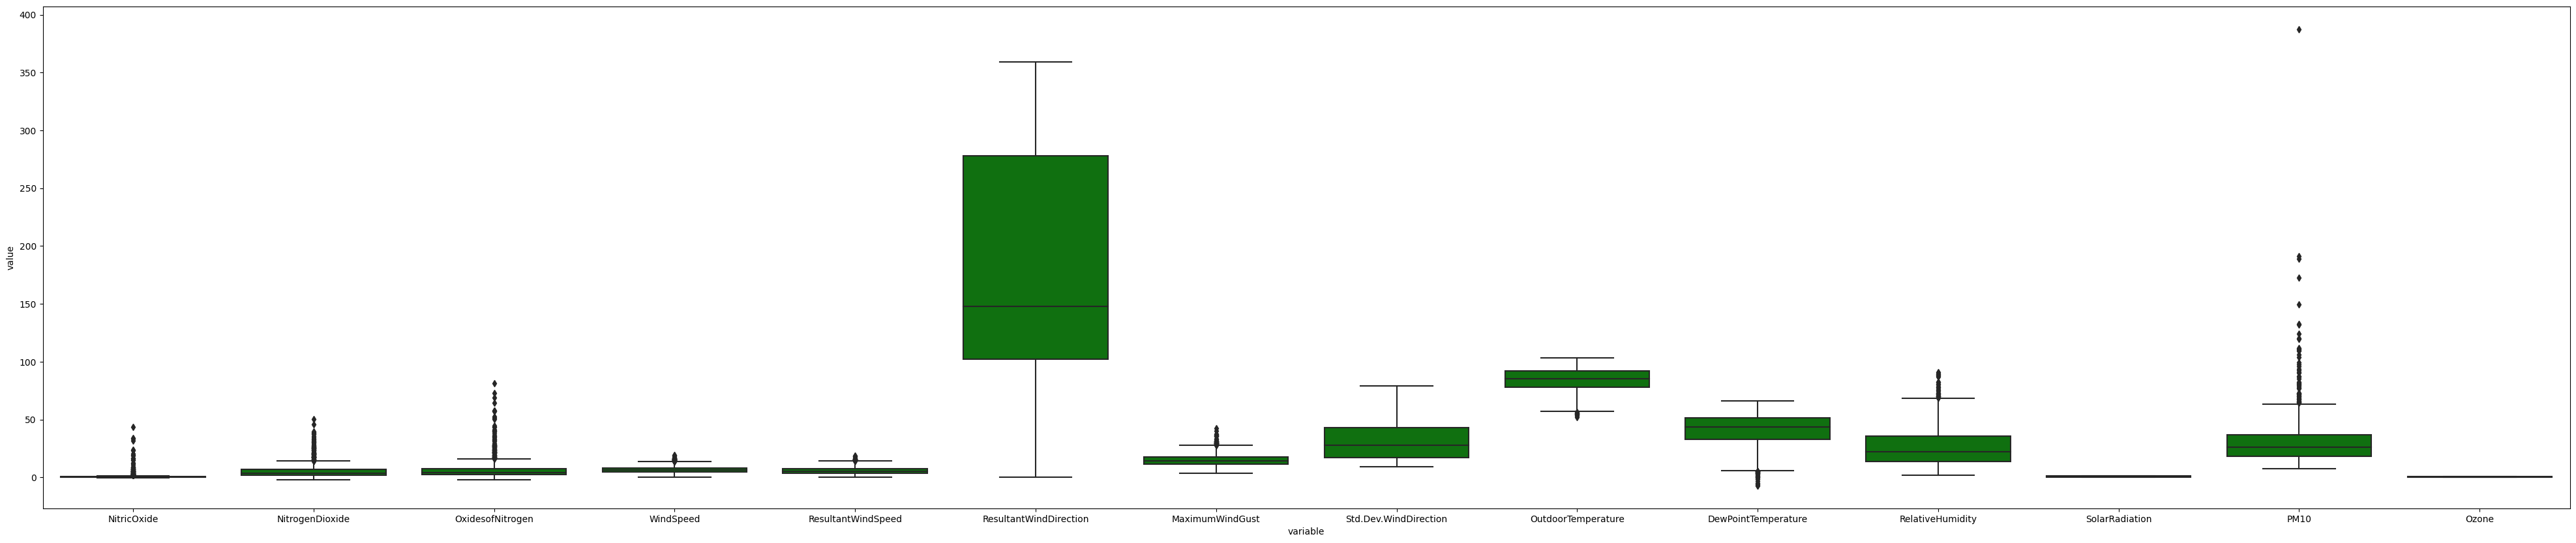

In [ ]:
plt.figure(figsize = (50,10))
sns.boxplot(data = data.melt(),
            x = 'variable',
            y = 'value',
            color = 'green' )

In [ ]:
data.replace(("?","NA"," "), np.nan, inplace = True)

In [ ]:
data.isna().sum()

NitricOxide               0
NitrogenDioxide           0
OxidesofNitrogen          0
WindSpeed                 0
ResultantWindSpeed        0
ResultantWindDirection    0
MaximumWindGust           0
Std.Dev.WindDirection     0
OutdoorTemperature        0
DewPointTemperature       0
RelativeHumidity          0
SolarRadiation            0
PM10                      0
Ozone                     0
dtype: int64

###**Percentage of missing values/data**

In [ ]:
vname=data.columns
vname
a=0
for i in vname:
  x= data[i].isna().sum()
  if x!=0:
    print(i)
    print("The missing values proportion "+ str(x/len(data.index)))

  a=a+x

print("Total missing value = "+ str(a))

Total missing value = 0


###**Missing values**

<Axes: >

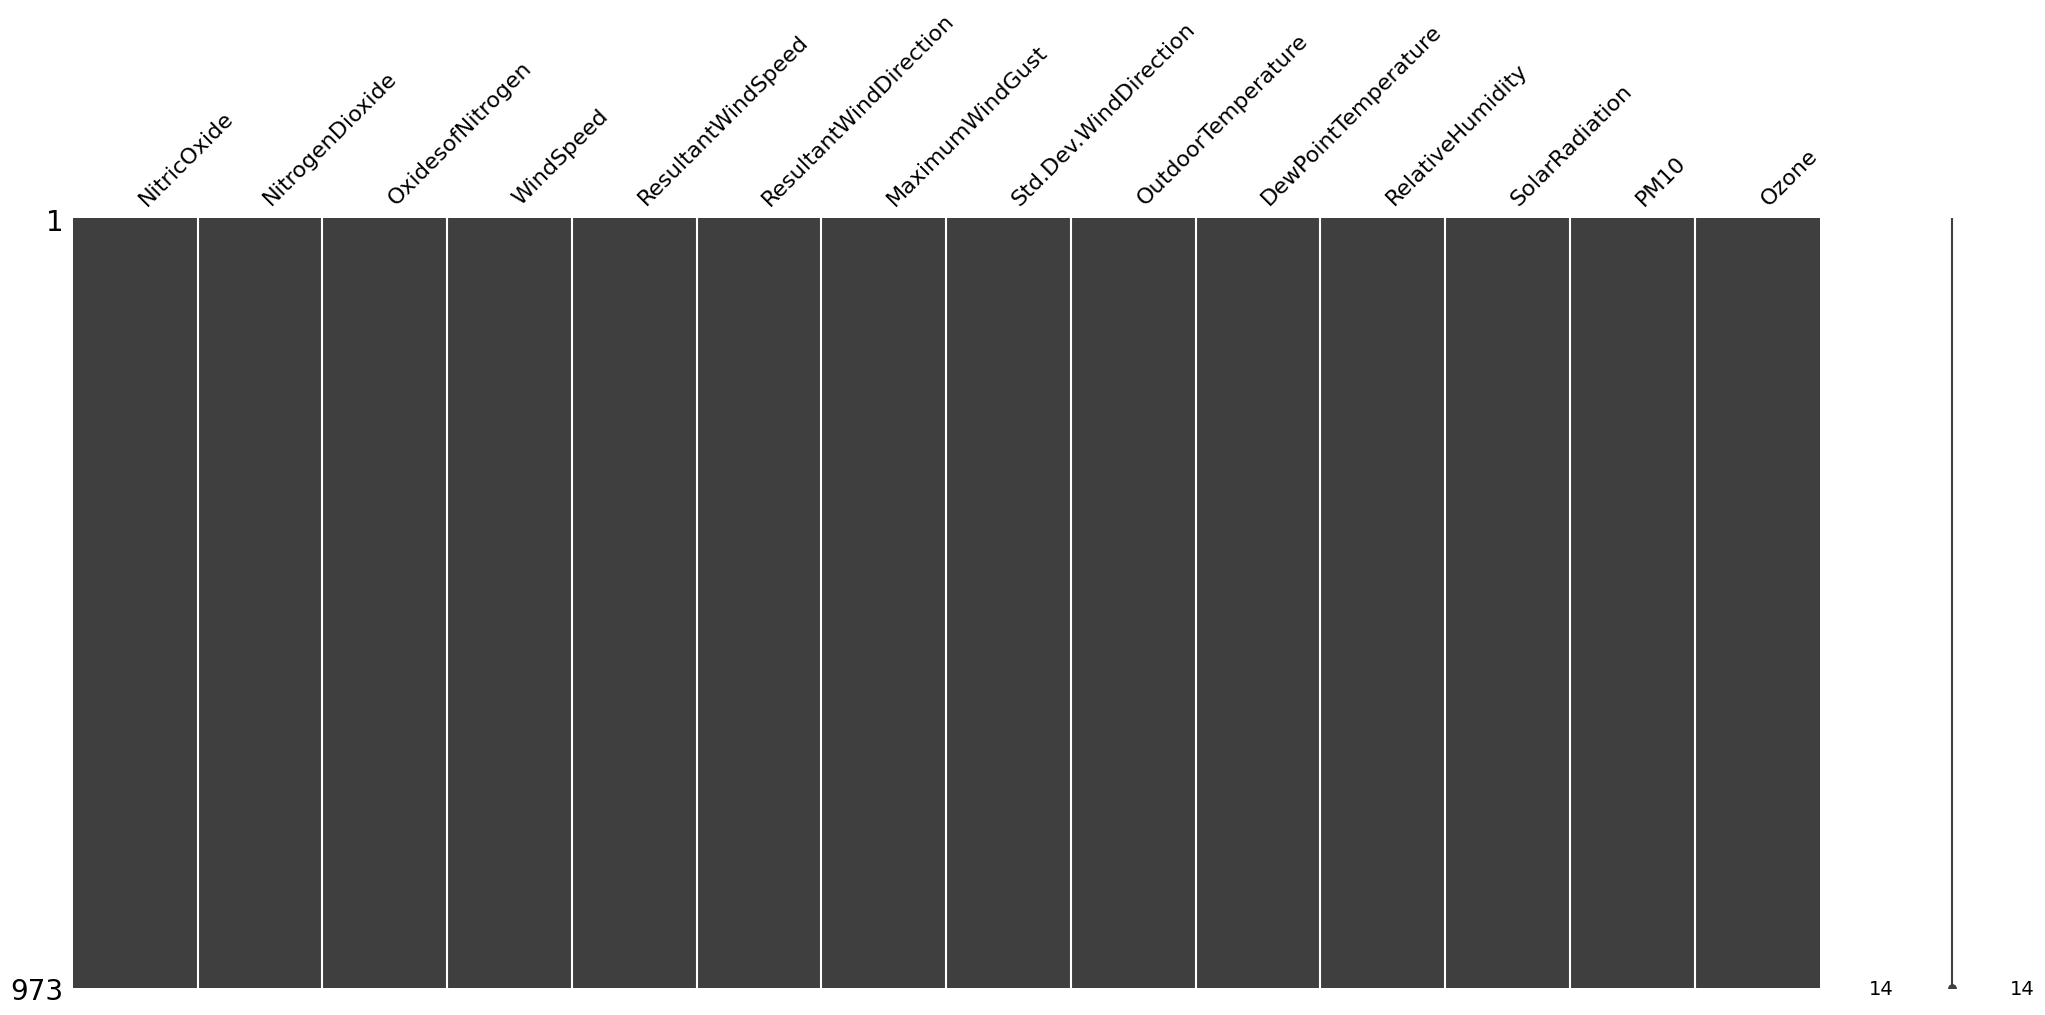

In [ ]:
#visualising the missing data
msno.matrix(data)

###**Data Preparation**

---

* The Data types of the variables are float64 and int64
* There are no missing values in the Data
* No issues observed
* Outliers were observed in the following features Nitricoxide, NitrogenDioxide
OxideofNitrogen, WindSpeed, ResultantWindDirection, Maximum wind gust, Outdoor Temperature, DewPoint Temperature, Relative Humidity and PM10

#**Exploratory Data Analysis**

---


*Inspect the frequency distribution of the target variable.*

<Axes: xlabel='Ozone', ylabel='count'>

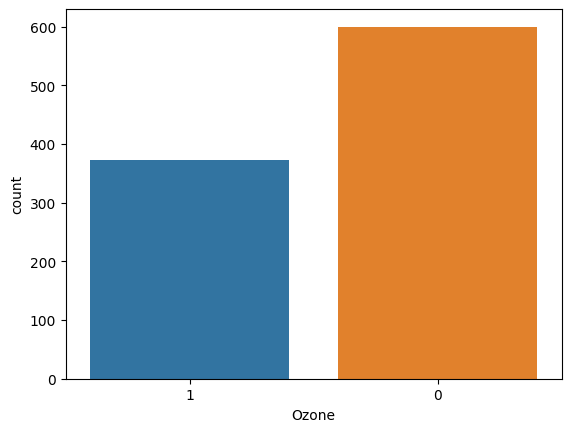

In [ ]:
#convert to pandas dataframe
#hist(data.Ozone, color="orange")
sns.countplot(x='Ozone', data=data, order=data['Ozone'].value_counts(ascending=True).index)


This can be an imbalanced data because there are more 0 class than the 1 class.

In [ ]:
#upsampling the minority value in target variable

target_value_to_upsample = 1
upsample_factor = 0.6  # Increase the number of instances

# Separate the minority class
minority_class = data[data['Ozone'] == target_value_to_upsample]

# Calculate the number of instances to upsample
instances_to_upsample = int(len(minority_class) * upsample_factor)

# Upsample the minority class
upsampled_class = minority_class.sample(n=instances_to_upsample, replace=True)

# Concatenate the original DataFrame with the upsampled minority class
upsampled_data = pd.concat([data, upsampled_class])

# Shuffle the DataFrame to mix the instances
upsampled_data = upsampled_data.sample(frac=1, random_state=42).reset_index(drop=True)
print(upsampled_data)

      NitricOxide  NitrogenDioxide  OxidesofNitrogen  WindSpeed  \
0            -0.1              0.8               0.7        8.7   
1             0.4              1.7               2.2       16.6   
2             0.5              5.5               5.9        4.1   
3             0.5              3.4               3.9        5.8   
4             0.1              1.1               1.1        4.3   
...           ...              ...               ...        ...   
1191          0.3              5.2               5.8        5.5   
1192         -0.1              6.0               6.1        5.1   
1193         -0.3              4.9               4.9        6.3   
1194          0.2             -1.0              -0.7        6.9   
1195          0.4              1.7               2.2       16.6   

      ResultantWindSpeed  ResultantWindDirection  MaximumWindGust  \
0                    8.2                      83             17.4   
1                   16.1                     298         

<Axes: xlabel='Ozone', ylabel='count'>

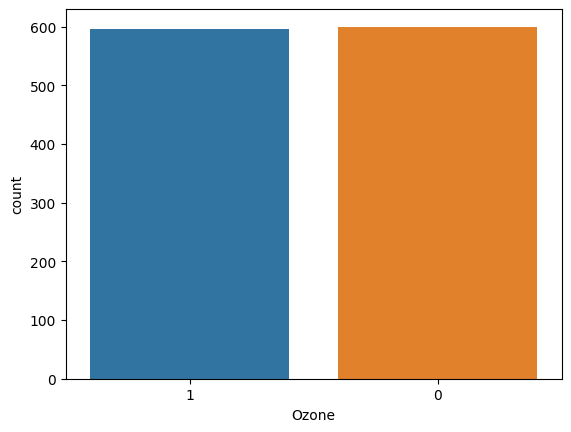

In [ ]:
#visualizing the balanced data
sns.countplot(x='Ozone', data=upsampled_data, order=upsampled_data['Ozone'].value_counts(ascending=True).index)

###Explore the associations between target and other attributes.

In [ ]:
#Compute Pairwise Correlation between features and label(Ozone)
data.corrwith(data['Ozone'])

NitricOxide              -0.202773
NitrogenDioxide          -0.269356
OxidesofNitrogen         -0.270640
WindSpeed                -0.374123
ResultantWindSpeed       -0.478344
ResultantWindDirection   -0.104012
MaximumWindGust          -0.204831
Std.Dev.WindDirection     0.644677
OutdoorTemperature        0.496875
DewPointTemperature      -0.199100
RelativeHumidity         -0.442355
SolarRadiation            0.477930
PM10                     -0.100620
Ozone                     1.000000
dtype: float64

###**Interesting Findings**
---
- The rest are negatively correlated to the label(Ozone) except Std.Dev.WindDirection, Solar Radiation and OutdoorTemperature

- Nitogen Dioxide has a strong correlation with Oxides of Nitrogen with a value of 0.964

- The data is not large enough to be considered an imbalanced data but the difference in the value of 0 and 1 is noticeable.

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3).set_properties(**{'font-size': '7pt'})

<ipython-input-15-6d912eccffed>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(3).set_properties(**{'font-size': '7pt'})


,NitricOxide,NitrogenDioxide,OxidesofNitrogen,WindSpeed,ResultantWindSpeed,ResultantWindDirection,MaximumWindGust,Std.Dev.WindDirection,OutdoorTemperature,DewPointTemperature,RelativeHumidity,SolarRadiation,PM10,Ozone
NitricOxide,1.000,0.646,0.825,-0.141,-0.094,-0.021,-0.217,-0.078,-0.229,-0.022,0.090,-0.121,0.179,-0.203
NitrogenDioxide,0.646,1.000,0.964,-0.288,-0.195,-0.013,-0.410,-0.154,-0.271,-0.060,0.079,-0.326,0.266,-0.269
OxidesofNitrogen,0.825,0.964,1.000,-0.262,-0.176,-0.018,-0.378,-0.142,-0.279,-0.051,0.091,-0.284,0.260,-0.271
WindSpeed,-0.141,-0.288,-0.262,1.000,0.972,0.006,0.888,-0.537,-0.235,-0.020,0.091,-0.090,0.282,-0.374
ResultantWindSpeed,-0.094,-0.195,-0.176,0.972,1.000,0.017,0.812,-0.709,-0.312,0.016,0.163,-0.215,0.285,-0.478
ResultantWindDirection,-0.021,-0.013,-0.018,0.006,0.017,1.000,0.037,-0.047,-0.084,-0.178,-0.023,-0.046,-0.200,-0.104
MaximumWindGust,-0.217,-0.410,-0.378,0.888,0.812,0.037,1.000,-0.304,-0.062,-0.091,-0.048,0.041,0.240,-0.205
Std.Dev.WindDirection,-0.078,-0.154,-0.142,-0.537,-0.709,-0.047,-0.304,1.000,0.425,-0.127,-0.327,0.525,-0.165,0.645
OutdoorTemperature,-0.229,-0.271,-0.279,-0.235,-0.312,-0.084,-0.062,0.425,1.000,-0.198,-0.649,0.408,0.008,0.497
DewPointTemperature,-0.022,-0.060,-0.051,-0.020,0.016,-0.178,-0.091,-0.127,-0.198,1.000,0.780,-0.147,-0.084,-0.199


###**Data Partition**
---
Partitioning the data into two parts, the training data (D1), and the test data (D2) into Train set (67%) and Test set (33%)

In [ ]:
labels=data['Ozone']
#features = data.drop('Ozone', axis=1)
# Specify the names of the columns you want to drop
#columns_to_drop = ['NitricOxide', 'Ozone']

# Drop the specified columns
features = data.drop('Ozone', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33,shuffle=False, random_state=123)

 Create a input feature matrix from train data and delete the first column. Perform the same analysis for D2 dataset.

In [ ]:
X_train.shape
X_test.shape

(322, 13)

# **Logistic Regression**
---
Fit the logistic regression with any regularization (lasso, or, ridge, or Elastic Net) using the training data D1. Explain why you choose that regularization.

In [ ]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,cohen_kappa_score,precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay


###**Using Cross Validation to determine the optimal tuning Parameter**
---
Using L1 - Lasso, L2 -Ridge

In [ ]:
#cross-validation using the Lasso
lr = LogisticRegressionCV(penalty='l1',Cs=1000, max_iter=1000, cv=10, solver='liblinear', tol=0.001, multi_class="ovr")
ft=lr.fit(X_train, y_train)

In [ ]:
ft.score(X_train, y_train)

0.9139784946236559

In [ ]:
print(" Coefficients: ", ft.coef_  ,"\n Intercepts:" , ft.intercept_, "\n Numbers of Features :", ft.n_features_in_)

 Coefficients:  [[-2.52134261  0.56621316 -0.56465119 -0.83571992  0.65429579 -0.00382784
  -0.05599469  0.11334293 -0.05998349  0.09115497 -0.22489231  1.65359469
   0.01468016]] 
 Intercepts: [5.16522486] 
 Numbers of Features : 13


In [ ]:
#best C
c=ft.C_
print("Best lambda :" ,c[0])


Best lambda : 45.04573251759454


Lasso regularisation(L1) is chosen because the confidence score of the L1 (91.8) is greater than the confidence score of L2 (91.5%)

In [ ]:
n_alphas = 1000
alphas = np.logspace(-2, 2, n_alphas)
coefs = []
for a in alphas:
    ELN = linear_model.Lasso(alpha=a, fit_intercept=False)
    ELN.fit(X_train, y_train)
    coefs.append(ELN.coef_)

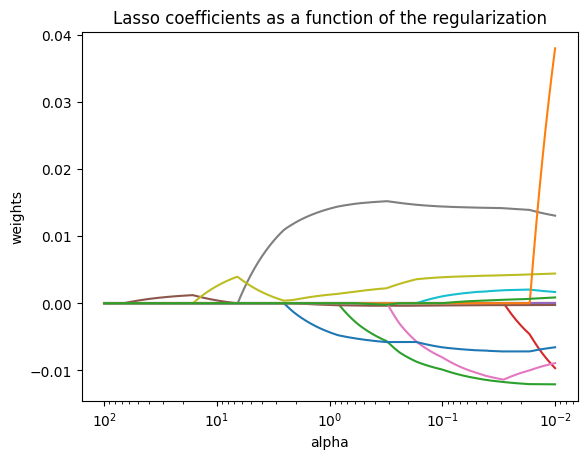

In [ ]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

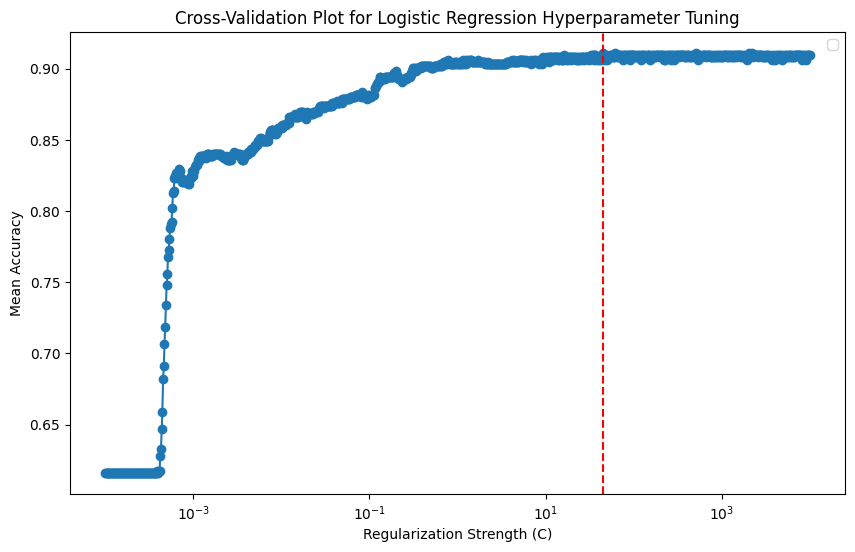

In [ ]:
# Plot the cross-validation accuracy for each hyperparameter
plt.figure(figsize=(10, 6))
plt.semilogx(lr.Cs_, np.mean(lr.scores_[1], axis=0), marker='o', linestyle='-')
plt.title('Cross-Validation Plot for Logistic Regression Hyperparameter Tuning')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Mean Accuracy')
plt.axvline(c, color='r', linestyle='--')
plt.legend()
plt.show()

###**INTERPRETATION OF ANALYSIS**
---
- The x-axis of the plot represents the regularization strength (C), and the y-axis represents the mean accuracy obtained through cross-validation.
- The plot helps visualize how the model's performance changes with different values of the hyperparameter.
- The optimal hyperparameter is chosen based on the maximum mean accuracy across cross-validation folds.
- The red dashed line indicates the regularization strength (C) that results in the highest mean accuracy, and this value is considered optimal.

##**Using the best learning rate, we apply the model.**

In [ ]:
#model2 = linear_model.ElasticNet(alpha=0.01, l1_ratio=modelcv.l1_ratio_,  max_iter=1000, copy_X=True, tol=0.001)
#model2.fit(X_train, y_train)

#model = LogisticRegression(penalty='l2', l1_ratio=modelcv.l1_ratio_, tol=0.0001, C=dg, intercept_scaling=1, solver='saga', max_iter=1000, multi_class='ovr')
#model.fit(X_train, y_train)

model = LogisticRegression(penalty='l1', tol=0.0001, C=c[0], intercept_scaling=1, solver='liblinear', max_iter=1000, multi_class='ovr')
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9170506912442397

In [ ]:
print(model.n_features_in_)
print(model.intercept_)
print(model.coef_)

13
[6.16374051]
[[-2.13871486  1.02021234 -1.02635141 -1.32490475  1.14755603 -0.00405961
  -0.03856797  0.13833199 -0.07653271  0.1001291  -0.24478139  1.7032578
   0.01426961]]


In [ ]:
prediction=model.predict(X_test)
prediction

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

Ridge has a confidence level of 91.5% while Lasso has a confidence level of 91.8%

In [ ]:
model.predict_proba(X_test)

In [ ]:
parameters = model.get_params()
parameters

{'C': 45.04573251759454,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
cnf_matrix = confusion_matrix(y_test, prediction)
print(cnf_matrix)

[[178  21]
 [ 14 109]]


Text(0.5, 427.9555555555555, 'Predicted label')

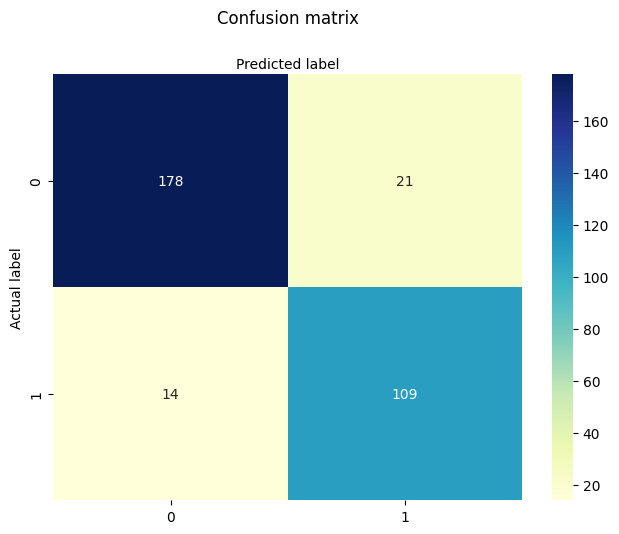

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Text(0.5,257.44,'Predicted label')

In [ ]:
#Accuracy
print('Accuracy', accuracy_score(y_test, prediction).round(2))
# Precision
print('Precision:', precision_score(y_test, prediction).round(2))
# Recall/Sensitivity
print('Sensitivity (Recall):', recall_score(y_test, prediction).round(2))
# F1 Score
print('F1 score: ',f1_score(y_test, prediction).round(2))
#Specificity
specificity = accuracy_score(y_test, prediction)
print('Specificity:', specificity)

Accuracy 0.89
Precision: 0.84
Sensitivity (Recall): 0.89
F1 score:  0.86
Specificity: 0.8913043478260869


In [ ]:
target_names = ['Low Ozone', 'High Ozone']
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

   Low Ozone       0.93      0.89      0.91       199
  High Ozone       0.84      0.89      0.86       123

    accuracy                           0.89       322
   macro avg       0.88      0.89      0.89       322
weighted avg       0.89      0.89      0.89       322



###**Cohen Kappa**

In [ ]:
print(cohen_kappa_score(y_test, prediction))
# https://vitalflux.com/cohen-kappa-score-python-example-machine-learning/

0.772258820676555


###**Finding MSE**

In [ ]:
# Mean Squared Error
mean_squared_error(y_test,prediction)

0.10869565217391304

###**Finding misclassification rate**

In [ ]:
#Misclassification Rate
(1-accuracy_score(y_test, prediction)).round(2)

0.11

##**ROC Curve**

area under ROC 0.89


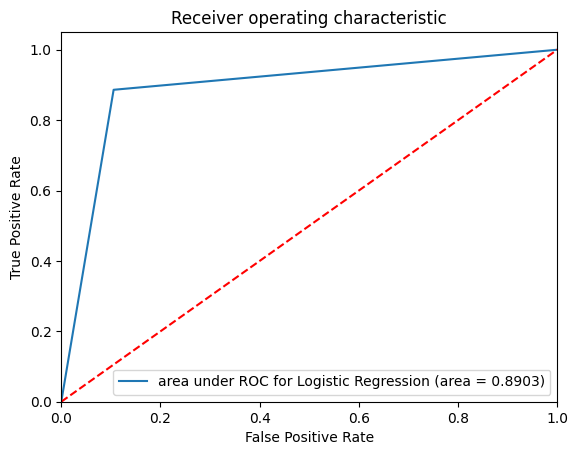

In [ ]:
print("area under ROC " + str(roc_auc_score(y_test, prediction).round(2)))

logit_roc_auc = roc_auc_score(y_test, prediction)
fpr, tpr, thresholds = roc_curve(y_test, prediction)
plt.figure()
plt.plot(fpr, tpr, label='area under ROC for Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

###**INTERPRETATION OF ANALYSIS**
---
- The ROC curve visually represents the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) for different classification thresholds.
- The AUC (Area Under the Curve) represents the probability that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative instance. A higher AUC indicates better discrimination performance.
- In the legend of the ROC curve plot, the AUC value is displayed.

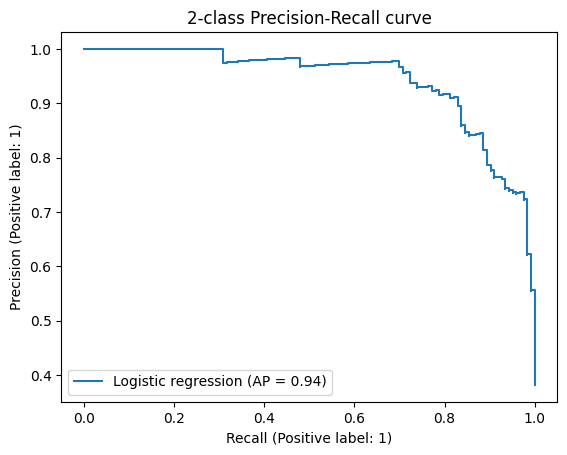

In [ ]:
#plotting precision-recall curve
display = PrecisionRecallDisplay.from_estimator(
    model, X_test, y_test, name="Logistic regression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

#**Artificial Neural Network - ANN**

In [ ]:
#install necessary packages
!pip install -q -U keras-tuner
!pip install keras_visualizer
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.1 MB/s eta 0:00:00


In [ ]:
#import necessary libraries

from keras_visualizer import visualizer
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from keras.models import Sequential
from keras.layers import Dense
import keras_tuner as kt
from kerastuner.tuners import RandomSearch

<ipython-input-40-fe56d0a80c15>:12: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
# Define the model-building function for Keras Tuner
def build_model(hp):
    model = keras.Sequential()

    # Input layer
    model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))

    # Tune the number of layers
    for i in range(hp.Int('num_layers', min_value=1, max_value=3, step=1)):
        # Tune the number of units in each layer
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i), min_value=16, max_value=128, step=16),
                               activation='selu'))

    # Output layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Tune the learning rate
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')


    # Compile the model
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd']),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Initialize the RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    directory='tuner_dir',  # Directory to save logs and checkpoints
    project_name='binary_classification'
)

# Perform the search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Trial 10 Complete [00h 00m 02s]
val_accuracy: 0.8726708292961121

Best val_accuracy So Far: 0.8788819909095764
Total elapsed time: 00h 00m 53s


In [ ]:
# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

#hyperparameter choices (optimizer, learning rate, number of layers, neurons per layer)
print(best_hp.values)
print(tuner.get_best_models()[0].summary())

{'num_layers': 2, 'units_0': 112, 'learning_rate': 0.0013931388242943601, 'optimizer': 'rmsprop', 'units_1': 32, 'units_2': 112}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 112)               1568      
                                                                 
 dense_1 (Dense)             (None, 32)                3616      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5217 (20.38 KB)
Trainable params: 5217 (20.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None


In [ ]:
# Build the final model with the best hyperparameters
final_model = tuner.hypermodel.build(best_hp)

In [ ]:
best_models = tuner.get_best_models(num_models=1)

In [ ]:
test_loss, test_acc = best_models[0].evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

11/11 [==============================] - 0s 3ms/step - loss: 0.3710 - accuracy: 0.8789
Test accuracy: 0.8788819909095764


In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hp)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

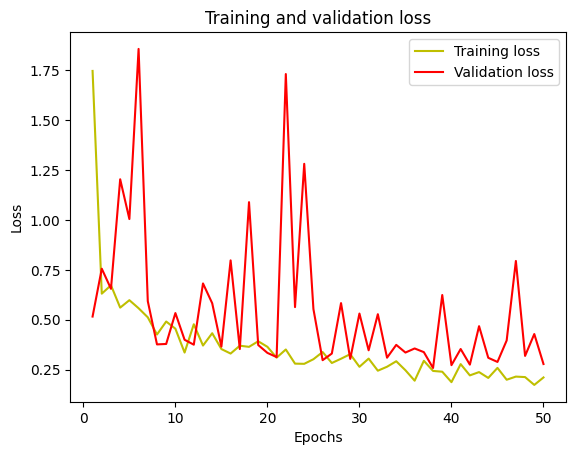

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model_nn = tuner.hypermodel.build(best_hp)

# Retrain the model using the best epoch
history = model_nn.fit(X_train, y_train, epochs=best_epoch, validation_data=(X_test, y_test))

In [ ]:
mse_test = model_nn.evaluate(X_test, y_test)
mse_test

11/11 [==============================] - 0s 2ms/step - loss: 0.2778 - accuracy: 0.9006


[0.2778206765651703, 0.9006211161613464]

In [ ]:
prediction_nn = model_nn.predict(X_test)
prediction_nn[0:3,]

11/11 [==============================] - 0s 2ms/step


array([[1.2005695e-06],
       [4.2202702e-01],
       [8.9441180e-01]], dtype=float32)

In [ ]:
#visualize the model
visualizer(model_nn,file_name='model-view', file_format='png', view=True)

In [ ]:
mean_squared_error(y_test, prediction_nn) # original prediction

0.07838288465103971

In [ ]:
# Calculate the confusion matrix
prediction_binary = np.round(prediction_nn).flatten() #because classification metrics cant handle a mix of binary and continous targets
cnf_matrix_nn = confusion_matrix(y_test, prediction_binary)
print(cnf_matrix_nn)


[[185  14]
 [ 18 105]]


In [ ]:
# Calculate the classification report
class_report = classification_report(y_test, prediction_binary)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       199
           1       0.88      0.85      0.87       123

    accuracy                           0.90       322
   macro avg       0.90      0.89      0.89       322
weighted avg       0.90      0.90      0.90       322



In [ ]:
#Accuracy
print('Accuracy', accuracy_score(y_test, prediction_binary).round(2))
# Precision
print('Precision:', precision_score(y_test, prediction_binary).round(2))
# Recall/Sensitivity
print('Sensitivity (Recall):', recall_score(y_test, prediction_binary).round(2))
# F1 Score
print('F1 score: ',f1_score(y_test, prediction_binary).round(2))
#Specificity
specificity = accuracy_score(y_test, prediction_binary)
print('Specificity:', specificity)

Accuracy 0.9
Precision: 0.88
Sensitivity (Recall): 0.85
F1 score:  0.87
Specificity: 0.9006211180124224


Text(0.5, 427.9555555555555, 'Predicted label')

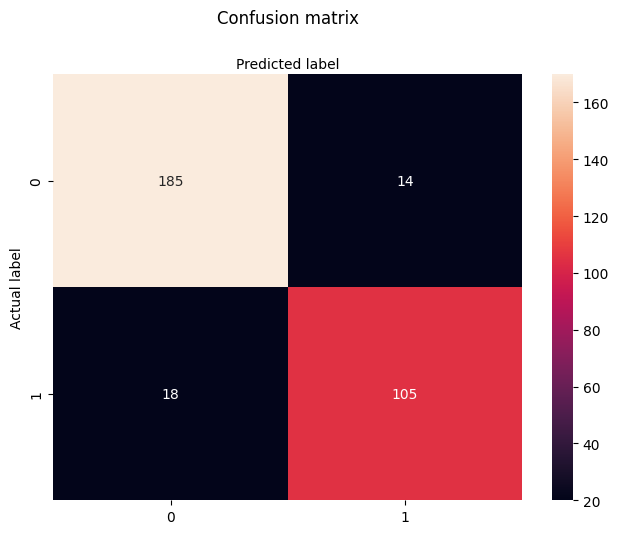

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn), annot=True, vmin=20, vmax=170 ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#calculate miss classification rate
accuracy = accuracy_score(y_test, prediction_binary)
miss_classification_rate = 1 - accuracy
print(miss_classification_rate)

0.0993788819875776


In [ ]:
#print(roc_auc_score(y_test, prediction_nn))
print(roc_auc_score(y_test, prediction_nn))

0.961596600890632


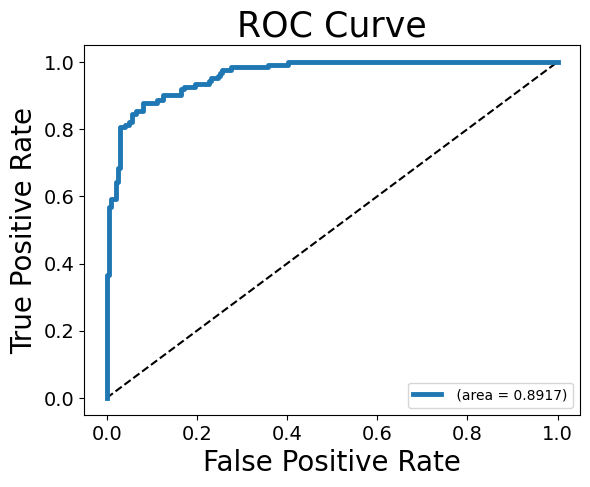

In [ ]:
# Get the ROC curve:
fpr, tpr, thresh = roc_curve(y_test, prediction_nn)
rocs=roc_auc_score(y_test, prediction_binary)
plt.figure()
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=' (area = %0.4f)' % rocs,linewidth=3.5)
plt.xlabel('False Positive Rate',size=20)
plt.ylabel('True Positive Rate',size=20)
plt.title('ROC Curve',fontsize=25)
plt.legend(loc="lower right")
plt.tick_params(axis='both',labelsize=14)
plt.show()

###**INTERPRETATION OF ANALYSIS**
---
- The ROC curve visually represents the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) for different classification thresholds.
- The AUC (Area Under the Curve) represents the probability that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative instance. A higher AUC indicates better discrimination performance.
- In the legend of the ROC curve plot, the AUC value is displayed.

#**COMPARISON**

 It is important to note that the AUC-ROC Curve of the Logistic regression (0.89) is less than the AUC-ROC Curve of the artificial neural network (0.96) and the Accuracy and Recall of the artificial neural network (about 90% and 91%) is greater than the accuracy of the Logistic Regression(about 89% and 89%). The artificial neural network seems to be best suited for the Ozone dataset because of the high Precision, Specificity, Recall and Accuracy value.
 However, the dataset is not large, which may not have provided the neural network with sufficient data to learn intricate features and patterns.

**Observation:**
- After utilising different activation functions (and tuning the parameters), the Scaled Exponential Linear Unit(SeLU) produced the highest accuracy against other activation functions (ReLU, sigmoid etc).
Balancing the data had no effect on the accuracy of the models, this could be because the dataset is not large enough to need upsampling/downsampling.